Steg 1:
Det vi har börjat med är att vi har importerat CSV-filen i VS Code och sedan läst in filen med pandas.read_csv och eftersom filen är semikolon sepererad så har vi använt sep=";" Vi kan se att det finns 10 000 rader i varje kolumn, 10 kolumner och inga nollvärden etc. (Vi får finslipa texterna, detta är bara liten start)

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("car_price_dataset.csv", sep=";")
print(df.head()) #visar de första raderna i datan
print(df.shape)  #kollar storlek på rader och kolumner
print(df.info()) # kontrollerar kolumner och datatyper

        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi      Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-Automatic   286618   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867  
(10000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3  

2. Deskriptiv statistik

In [30]:
print(df.describe()) # Medelvärde, median, min/max, standardavvikelse
print()
print(df['Brand'].value_counts()) # Antal unika värden i kategoriska kolumner. Kan också visualiseras med tex ett stapeldiagram. 
print()
print(df['Model'].value_counts()) # Antal unika värden i kategoriska kolumner. Kan också visualiseras med tex ett stapeldiagram. 
print()
print(df['Fuel_Type'].value_counts()) # Antal unika värden i kategoriska kolumner. Kan också visualiseras med tex ett stapeldiagram. 
print()
print(df['Transmission'].value_counts()) # Antal unika värden i kategoriska kolumner. Kan också visualiseras med tex ett stapeldiagram. 



print()
print("Amount of brands:", df['Brand'].nunique()) # Antal unika bilar i datasetet
print("Amount of models:", df['Model'].nunique()) # Antal unika modeller i datasetet

               Year   Engine_Size        Mileage         Doors   Owner_Count  \
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean    2011.543700      3.000560  149239.111800      3.497100      2.991100   
std        6.897699      1.149324   86322.348957      1.110097      1.422682   
min     2000.000000      1.000000      25.000000      2.000000      1.000000   
25%     2006.000000      2.000000   74649.250000      3.000000      2.000000   
50%     2012.000000      3.000000  149587.000000      3.000000      3.000000   
75%     2017.000000      4.000000  223577.500000      4.000000      4.000000   
max     2023.000000      5.000000  299947.000000      5.000000      5.000000   

             Price  
count  10000.00000  
mean    8852.96440  
std     3112.59681  
min     2000.00000  
25%     6646.00000  
50%     8858.50000  
75%    11086.50000  
max    18301.00000  

Brand
Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrol

4. Visualisering


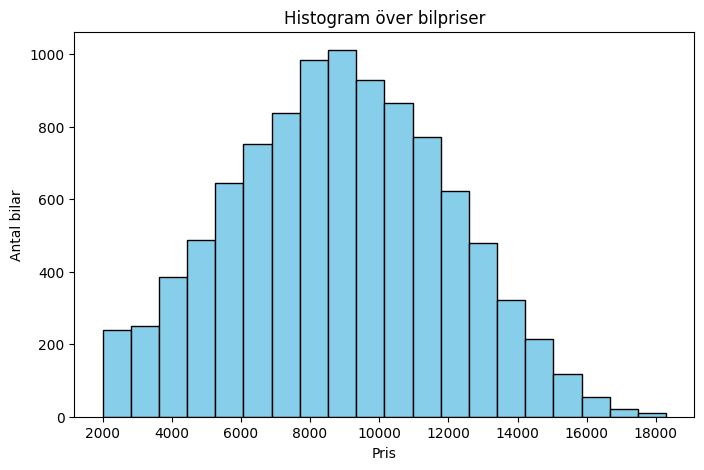

In [ ]:
# Histogram över bilpriser

plt.figure(figsize=(8,5))
plt.hist(df['Price'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram över bilpriser")
plt.xlabel("Pris")
plt.ylabel("Antal bilar")
plt.show()

# Visar på form på fördelning: Symmetrisk (normalfördelad), skev åt höger, skev åt vänster

C:\Users\user\AppData\Local\Temp\ipykernel_8252\3901247362.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=brands, patch_artist=True)


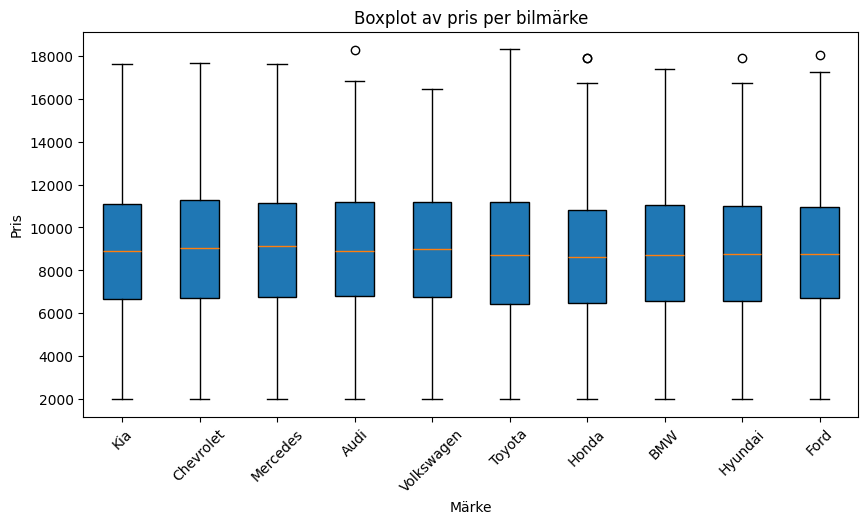

In [32]:
plt.figure(figsize=(10,5))
brands = df['Brand'].unique()
data_to_plot = [df[df['Brand']==brand]['Price'] for brand in brands]

plt.boxplot(data_to_plot, labels=brands, patch_artist=True)
plt.title("Boxplot av pris per bilmärke")
plt.xlabel("Märke")
plt.ylabel("Pris")
plt.xticks(rotation=45)
plt.show()

# Identifiera outliers som är relativa till gruppen, inte hela datan.

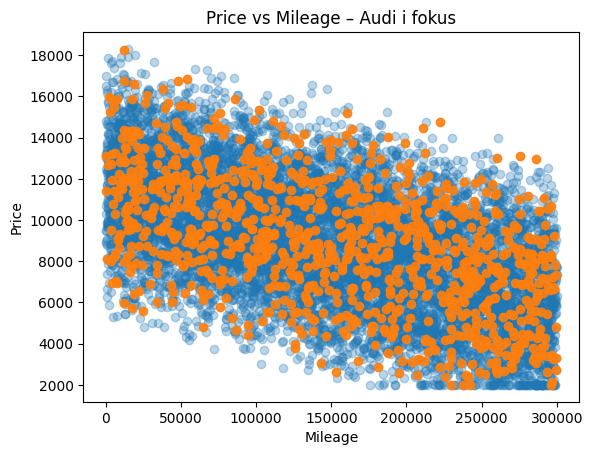

In [36]:
audi = df[df["Brand"] == "Audi"]
others = df[df["Brand"] != "Audi"]

plt.figure()
plt.scatter(others["Mileage"], others["Price"], alpha=0.3)
plt.scatter(audi["Mileage"], audi["Price"], alpha=0.9)

plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Price vs Mileage – Audi i fokus")

plt.show()